In [86]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import plotly.express as px
import plotly.graph_objects as go
import warnings
import missingno as mno
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

warnings.filterwarnings('ignore')

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [87]:
### Q. Read the bank dataset 
data = pd.read_csv('/Users/mohammadjuneidk/Downloads/Project/bank.csv',delimiter=';')

In [88]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [89]:
### Data transformation
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [90]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [91]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [92]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [93]:
data.shape

(4119, 21)

In [94]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Data preparation

Count of values in the Target column are
**************************************************
no     3668
yes     451
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

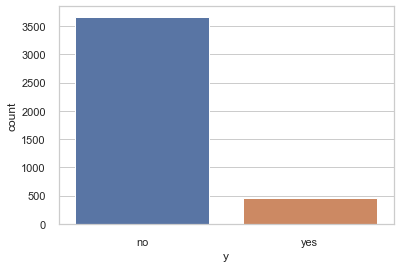

In [95]:
### Q. Find out in the target column what is the respective count of values
print('Count of values in the Target column are')
print('*'* 50)
print( data['y'].value_counts())

### Q. Also plot the values of y in form of a bar graph 
sns.countplot(x='y', data=data)

There are 36548 no's and 4640 yes's in the outcome variables.

In [96]:
fig = px.bar(data, x="y",
              orientation='v',
             color="y"

    )
fig.update_layout(title="Count of values in the Target column are",
                  autosize=False,
                  width=1000,
                  height=500,
                  template = "presentation",
                  uniformtext_mode='hide',
     
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
#fig.update_layout(hovermode="x unified")

fig.show()

Let's get a sense of the numbers across the two classes

In [97]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [98]:
sns.set(rc={'figure.figsize':(20,9)})

<AxesSubplot:xlabel='job', ylabel='count'>

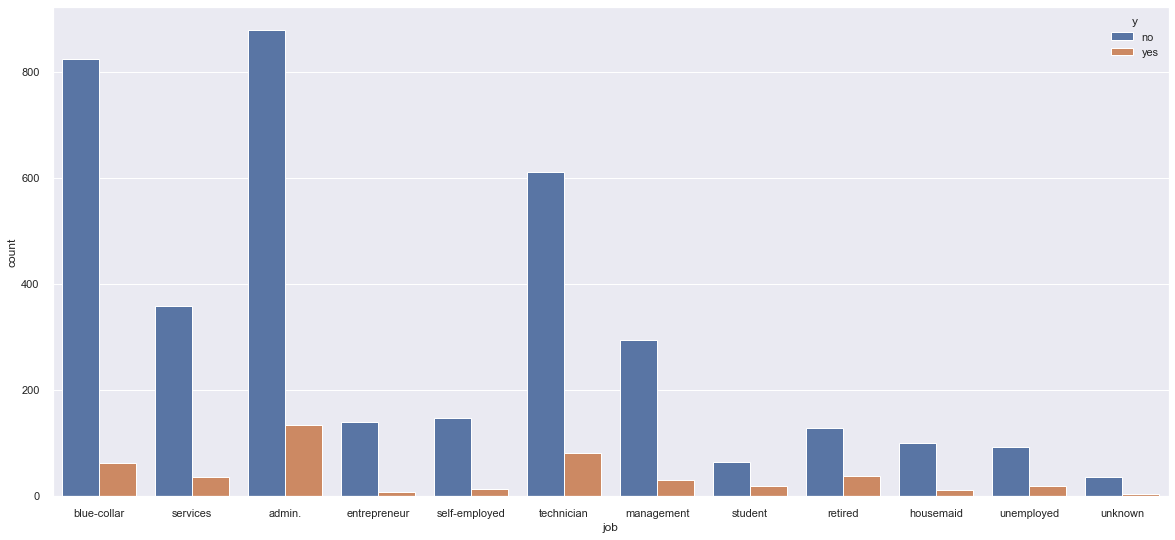

In [99]:
sns.countplot(x='job', data=data, hue='y')

In [100]:
## Create a visualization as shown below for variable 'job' and frequency of purchase
fig = px.bar(data, x="job",
              orientation='v',
             color="y",barmode="group"

    )
fig.update_layout(title="'job' and frequency of purchase",
                  autosize=False,
                  width=1500,
                  height=700,
                  template = "presentation",
                  #uniformtext_mode='hide',
     
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
#fig.update_layout(hovermode="x unified")

fig.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

In [101]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [102]:
s = data['y'].value_counts()
s

no     3668
yes     451
Name: y, dtype: int64

In [103]:
fig = px.bar(data, x="education",
              orientation='v',
             color="y"

    )
fig.update_layout(title="Count of values in the Target column are",
                  autosize=False,
                  width=1500,
                  height=800,
                  template = "presentation",
                  uniformtext_mode='hide',
     
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
#fig.update_layout(hovermode="x unified")

fig.show()

In [104]:
data['education'].value_counts()

university.degree      1264
Basic                  1231
high.school             921
professional.course     535
unknown                 167
illiterate                1
Name: education, dtype: int64

In [105]:
# we are filtering out the data for education and creating a new dataframe
basic =  data.loc[data.education == 'Basic',:]['y'].value_counts()
high_school = data.loc[data.education == 'high.school',:]['y'].value_counts()
illiterate = data.loc[data.education == 'illiterate',:]['y'].value_counts()
pro =  data.loc[data.education == 'professional.course',:]['y'].value_counts()
uni = data.loc[data.education == 'university.degree',:]['y'].value_counts()
unknown = data.loc[data.education == 'unknown',:]['y'].value_counts()

df = pd.DataFrame([basic,high_school,illiterate,pro,uni,unknown])

In [106]:
# chainging thne index of the dataframe
df.index=['basic','high_school','illiterate','pro','uni','unknown']
df

,no,yes
basic,1133.0,98.0
high_school,824.0,97.0
illiterate,1.0,NaN
pro,470.0,65.0
uni,1099.0,165.0
unknown,141.0,26.0


In [107]:
# as we can see above there is one nan value yes column of  illiterate row so it will not plot the illierate 
# now have to fill the nan value with the 0
df['yes'].fillna(0,inplace=True)

In [108]:
df

,no,yes
basic,1133.0,98.0
high_school,824.0,97.0
illiterate,1.0,0.0
pro,470.0,65.0
uni,1099.0,165.0
unknown,141.0,26.0


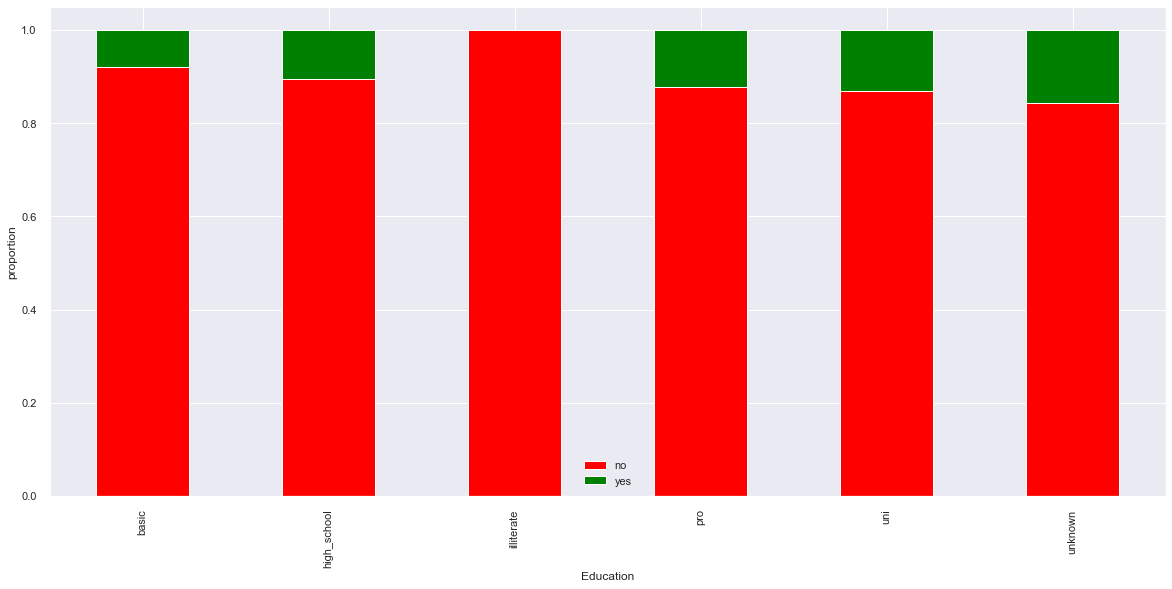

In [109]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers
ax = df.apply(lambda x:x/sum(x), axis=1).plot(kind ='bar', stacked =True,xlabel = 'Education',ylabel = 'proportion',color=['red', 'green'])
plt.show()

Education seems a good predictor of the outcome variable.

In [110]:
## Create a visualization as shown below for variable 'job' and frequency of purchase
fig = px.bar(data, x="month",
              orientation='v',
             color="y",barmode="group"

    )
fig.update_layout(title="'job' and frequency of purchase",
                  autosize=False,
                  width=1500,
                  height=700,
                  template = "presentation",
                  #uniformtext_mode='hide',
     
                )

fig.update_xaxes(showgrid= False)
fig.update_yaxes(showgrid= False)  
#fig.update_layout(hovermode="x unified")

fig.show()

<AxesSubplot:xlabel='month', ylabel='count'>

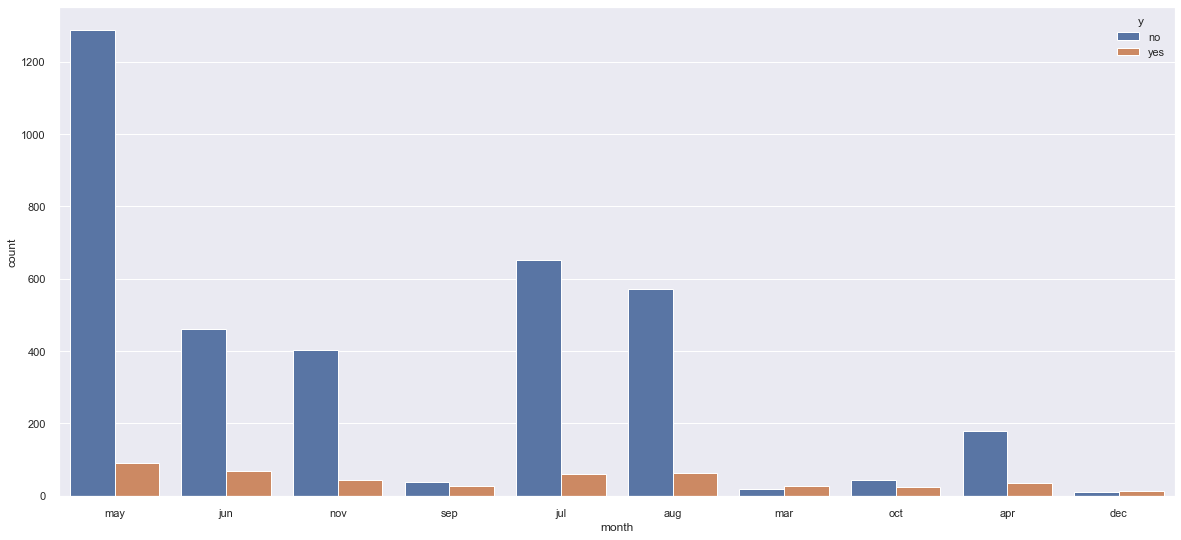

In [111]:
## Q. Write code for the visualization as shown below
sns.countplot(x='month', data=data, hue='y')

Month might be a good predictor of the outcome variable

In [112]:
## Q. Write code for the visualization as shown below
fig = px.histogram(data, x="age")
fig.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [113]:
data.replace({'y':{'yes': 1, 'no' : 0}}, inplace= True)

In [114]:
print('Count of values in the Target column are')
print('*'* 50)
print( data['y'].value_counts())

Count of values in the Target column are
**************************************************
0    3668
1     451
Name: y, dtype: int64


In [115]:
# data separation for analysis
no = data[data['y'] == 0]
yes = data[data['y'] == 1]
print(no.shape)
print(yes.shape)
normal_sample = data.sample(n = 451)
# now we will concate the two dataframes
final = pd.concat([normal_sample,yes], axis = 0)

(3668, 21)
(451, 21)


In [116]:
final.shape

(902, 21)

In [117]:
## Write code to convert following columns to equivalent dummy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
final = pd.get_dummies(data, columns = cat_vars)
final


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,...,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [118]:
final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

### Feature Selection

In [119]:
# splitting the data into features and target
X = final.drop('y', axis=1)
y = final['y']

In [120]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [121]:
# splitting the dataset in to train and test
x_train , x_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state= 0 )

In [122]:
# make a threshold for quasi constant.
threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in x_train.columns:

    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

# drop the quasi constant columns
x_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)

['job_unknown', 'marital_unknown', 'education_illiterate', 'default_yes', 'month_dec', 'month_mar', 'month_oct', 'month_sep']


In [123]:
sns.set(rc={'figure.figsize':(20,9)})

{'nr.employed', 'contact_cellular', 'default_unknown', 'contact_telephone', 'marital_single', 'education_Basic', 'poutcome_failure', 'poutcome_success', 'previous', 'poutcome_nonexistent', 'housing_yes', 'cons.price.idx', 'loan_yes', 'loan_unknown', 'euribor3m'}


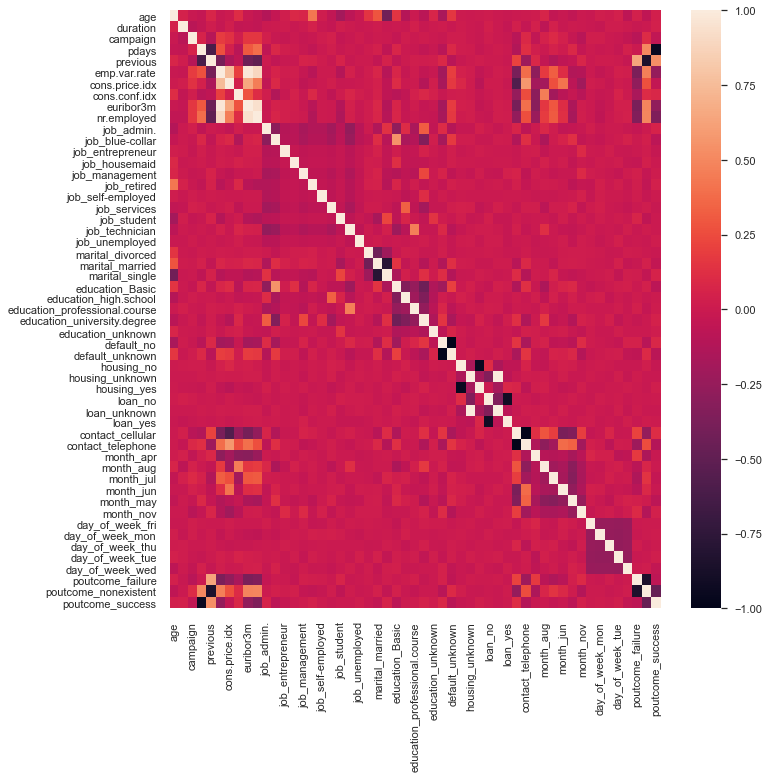

In [124]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = x_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)

print(corr_features)

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [125]:
final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [126]:
n = final[['education_Basic', 'poutcome_failure', 'poutcome_success', 'marital_single', 'loan_unknown', 'previous', 'cons.price.idx', 'default_unknown', 'housing_yes', 'poutcome_nonexistent', 'contact_telephone', 'contact_cellular', 'nr.employed', 'euribor3m', 'loan_yes']]

In [127]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X = final.drop(columns=['y'], axis=1)
#X = final[['education_Basic', 'poutcome_failure', 'poutcome_success', 'marital_single', 'loan_unknown', 'previous', 'cons.price.idx', 'default_unknown', 'housing_yes', 'poutcome_nonexistent', 'contact_telephone', 'contact_cellular', 'nr.employed', 'euribor3m', 'loan_yes']]
y=final['y']

### Implementing the model

### Logistic Regression Model Fitting

In [128]:
## Write code to implement Logistic Regression module by training the X,Y variables and perform prediction on the Test dataset.
# splitting the dataset in to train and test
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state= 0 )
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

### Confusion Matrix

[[1068   33]
 [  78   57]]


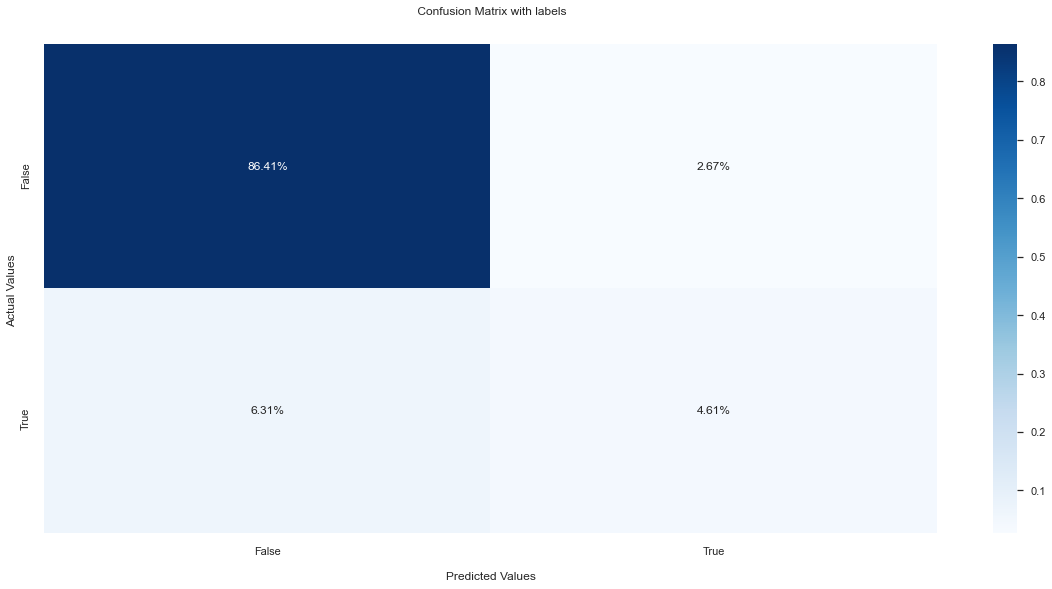

In [129]:
## Create and Analyze the confusion matrix
### Ques 7 -- Create the confusion matrix
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, lr_yhat) 
print(cf_matrix) 
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

### ROC/AUC

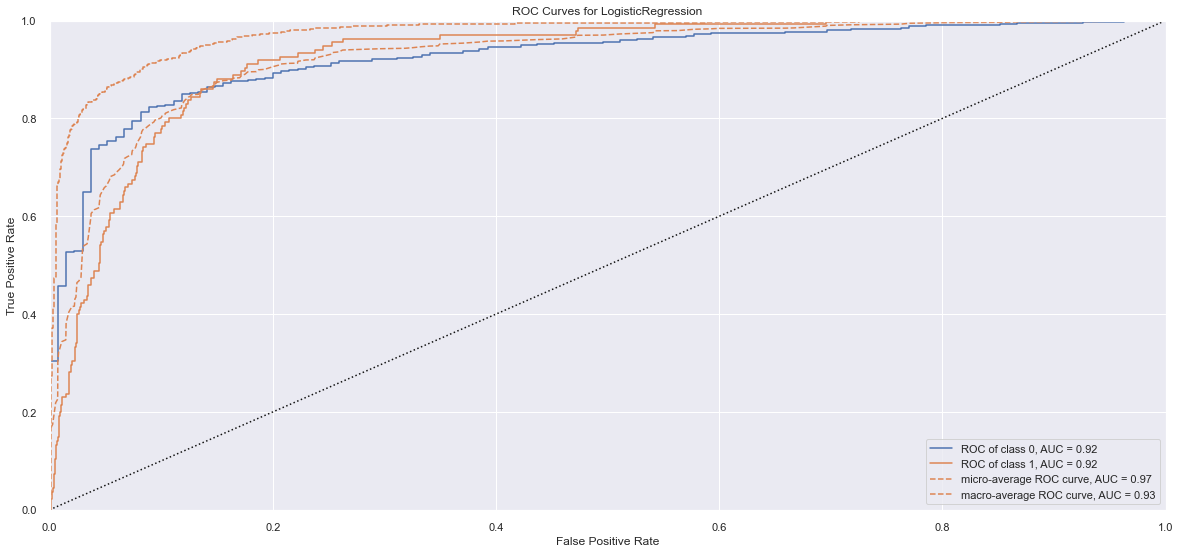

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [130]:
## Check for ROC and Area under the curve.
# assigning classes
classes = ['0', '1']
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(lr, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()  

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1101
           1       0.63      0.42      0.51       135

    accuracy                           0.91      1236
   macro avg       0.78      0.70      0.73      1236
weighted avg       0.90      0.91      0.90      1236



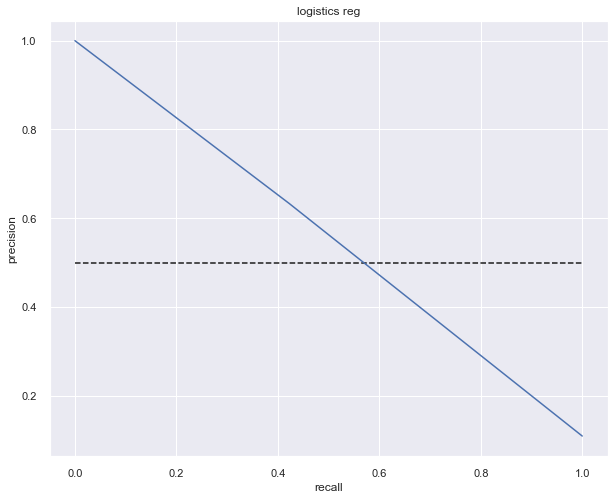

In [131]:
## Calculate and analyze the Recall and precision
from sklearn.metrics import classification_report
print("-"* 20,"Classification Report","-"* 20)
print(classification_report(y_test, lr_yhat))
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_yhat)
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('logistics reg')
plt.show()

### Accuracy

In [132]:
## Find the accuracy of your model
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print("*"* 100)


Accuracy score of the Logistic Regression model is 0.9101941747572816
F1 score of the Logistic Regression model is 0.5066666666666666
****************************************************************************************************


### Cross-validation

In [133]:
## Allow 10-fold cross validation to run on all cores.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import SCORERS
scores = cross_val_score(lr,X,y, cv=10 , scoring='r2')
scores

array([ 0.10190736,  0.05201332,  0.10190736,  0.20169543,  0.12685437,
        0.17674841,  0.07696034,  0.12685437,  0.21691613, -0.07304189])

In [134]:
# checking the mean of all the scores
scores.mean()

0.1108815200505642

In [135]:
# these are the list of scores which can be used to validate the model
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [136]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [137]:
# creating a list of models and assinging it to the model variable 
models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [138]:
# creating function to compare the models accuracy
def compare_models():
    for model in models:
        model.fit(X_train,y_train)
        test_data_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,test_data_pred)
        print('accuracy score of the model',model, '=', accuracy)

In [139]:
compare_models()

accuracy score of the model LogisticRegression() = 0.9101941747572816
accuracy score of the model SVC(kernel='linear') = 0.9085760517799353
accuracy score of the model KNeighborsClassifier() = 0.9077669902912622
accuracy score of the model RandomForestClassifier() = 0.9029126213592233


In [140]:
cv_score_lr = cross_val_score(LogisticRegression(),X,y, cv = 10)
print(cv_score_lr)
print('mean accuracy is' ,cv_score_lr.mean())

[0.91262136 0.90776699 0.91262136 0.9223301  0.91504854 0.91990291
 0.91019417 0.91504854 0.9223301  0.89537713]
mean accuracy is 0.9133241206623675


In [141]:
cv_score_svc = cross_val_score(SVC(kernel='linear'),X,y, cv = 10)
print(cv_score_svc)
print('mean accuracy is' ,cv_score_svc.mean())

[0.91747573 0.89805825 0.8907767  0.90291262 0.91747573 0.90776699
 0.90533981 0.91262136 0.91262136 0.90997567]
mean accuracy is 0.9075024212789078


In [142]:
# automating the above process by creating a fucntion
def cross_validations():
    for model in models:                                              #iterating through the models coloumns
        cv_score = cross_val_score(model,X,y,cv = 10)                 # using sklearn cross_val_score and giving imputs of model and data and cross validation level
        mean_accuracy = sum(cv_score)/len(cv_score)                   # calculating the mean score 
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2)
        print('-'*50)
        print('mean accuracy of',model ,mean_accuracy,"%")            #printing all the model accuracy scores


In [143]:
# calling the function
cross_validations()

--------------------------------------------------
mean accuracy of LogisticRegression() 91.33 %
--------------------------------------------------
mean accuracy of SVC(kernel='linear') 90.75 %
--------------------------------------------------
mean accuracy of KNeighborsClassifier() 89.95 %
--------------------------------------------------
mean accuracy of RandomForestClassifier() 90.99 %


### Model Tuning

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9149465743824755
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


## after using hyper paramter tuning we got the paramatere
> let's use those parameters and try

In [147]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify = y, random_state= 1 )
lr = LogisticRegression(C= 10,penalty='l2' ,solver = 'lbfgs')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [148]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))
print("*"* 100)
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print("*"* 100)


Accuracy score of the Logistic Regression model is 0.9150485436893204
****************************************************************************************************
F1 score of the Logistic Regression model is 0.5493562231759657
****************************************************************************************************


> as we can see above the f1 score is increased

In [13]:
(skillo := 'villa' )

'villa'

In [10]:
(skillovilla := str(input))

'<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7ff63846bf10>>'